### 포켓몬스터 공식 홈페이지에서 이미지 데이터 수집
 - 바탕화면에 포켓몬도감이라는 폴더를 만들고
 - 이미지 데이터를 다운로드 받아서 폴더 안에 하나씩 저장하기

In [2]:
from selenium import webdriver as wb # 웹 브라우저를 제어하기 위한 라이브러리
from selenium.webdriver.common.keys import Keys # 웹에게 값을 '입력'하기 위한 라이버리
from selenium.webdriver.common.by import By # html 문서에서 선택자와 태그의 위치를 찾기위한 라이브러리
from bs4 import BeautifulSoup as bs # 컴퓨터가 이해하기 쉬운 객체로 변환해주는 라이브러리
import time # 코딩 중간에 쉬는시간을 부여해주는 라이브러리
import os # 파일이나 폴더를 생성해주는 라이브러리(파일 시스템 라이브러리)
from urllib.request import urlretrieve # 이미지 경로를 파일로 변환해주는 라이브러리

In [4]:
# 바탕화면에 '포켓몬도감' 이라는 폴더 생성하기 -> os 라이브러리 사용
# if not else
# 경로 불러올 때 \를 슬래쉬(/)나 \\로 바꿔줘야 함
if not os.path.isdir('C:/Users/SMHRD/Desktop/포켓몬도감') : # 바탕화면에 있는 아무폴더의 속성 -> 바탕화면의 위치(경로) 복사
    os.mkdir('C:/Users/SMHRD/Desktop/포켓몬도감') # 폴더를 생성하는 코드
    print('폴더가 생성되었습니다.')
else :
    print('이미지 폴더가 이미 존재합니다.')

# '\' -> 파이썬에서는 이스케이프 문자(\n 등등..) 여서 경로에서는 사용불가 -> '\ ->/'' 로 바꿔줌

# if not (경로/폴더1) -> 이 경로에 폴더1이 없으면? -> if not의 구문 실행 
#                              폴더1이 있다면 -> else의 구문 실행


# if not else로 쓰는 이유는 가독성을 위해
# 폴더가  없으면 
#     폴더를 생성
# 폴더가 있으면
#    이미 존재합니다 구문 출력

# if else 구문으로 작성해도 상관은 없음

이미지 폴더가 이미 존재합니다.


In [5]:
# 포켓몬스터 공식 홈페이지 정보 가져오기
driver = wb.Chrome()
driver.get('https://pokemonkorea.co.kr/pokedex')

In [6]:
# bs 객체화
soup = bs(driver.page_source, 'lxml')

In [8]:
poke_img = soup.select('img.img-fluid')
poke_img

[<img alt="" class="img-fluid" src="https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000101.png"/>,
 <img alt="" class="img-fluid" src="https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000201.png"/>,
 <img alt="" class="img-fluid" src="https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000301.png"/>,
 <img alt="" class="img-fluid" src="https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000302.png"/>,
 <img alt="" class="img-fluid" src="https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000303.png"/>,
 <img alt="" class="img-fluid" src="https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000401.png"/>,
 <img alt="" class="img-fluid" src="https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000501.png"/>,
 <img alt="" class="img-fluid" src="https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000601.png"/>,
 <img alt="" class="img-fluid" src="https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000602.png"/>,
 <img alt="" class="img-fluid" src="https://data1.pokemonkorea.c

In [9]:
poke_img[0].text
# .text -> [<여는태그> '컨텐츠' <닫는태그>]  의 '컨텐츠'를 가져온다
# img태그는 홑태그 이므로 <여는태그>만 있어서 컨텐츠가 존재하지 않는다.

''

In [10]:
# img태그의 정보를 가져오려면? -> 이미지가 저장된 경로값을 가져오면 됨
poke_img[0]

<img alt="" class="img-fluid" src="https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000101.png"/>

In [11]:
# img태그에서 경로(src)값만 추출
# 속성값을 가져오려면 -> 인덱싱으로 접근! poke_img의 0번째 인덱스에 '속성명' 인덱싱
poke_img[0]['src'] # src 만 인덱싱하면 됨

'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000101.png'

In [12]:
# 순수한 이미지 src(주소)값을 담을 리스트 제작 -> 반복문을 통해 하나하나 저장
img_list = []

for img in poke_img : # img 라는 변수 안에 하나하나 넣을 것이다. 뭐를? poke_img를
    img_list.append(img['src'])
img_list

['https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000101.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000201.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000301.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000302.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000303.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000401.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000501.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000601.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000602.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000603.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000604.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000701.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000801.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000901.png',
 'https://data1.pokemonkorea.co.kr/newdata/poked

### urlretrieve
- 이미지의 경로(src) 값을 활용해서 이미지 파일로 변환해주는 라이브러리 사용

In [13]:
# 이미지 파일로 저장
urlretrieve(img_list[0], 'C:/Users/SMHRD/Desktop/포켓몬도감/1번포켓몬.jpg')

('C:/Users/SMHRD/Desktop/포켓몬도감/1번포켓몬.jpg',
 <http.client.HTTPMessage at 0x1d8f6572e90>)

In [14]:
# 반복문을 사용해서 모든 데이터 저장하기
for i in range(len(img_list)):
    urlretrieve(img_list[i], f'C:/Users/SMHRD/Desktop/포켓몬도감/{i+1}번포켓몬.jpg')
    
# 이미지의 개수가 너무 적다 -> 스크롤을 해주자

### 화면에서 스크롤 내리는 방법
 - page down
 - ↓ 
 - end
 - space

In [54]:
# 키보드에 있는 end 키를 사용해서 스크롤 내리기 (자동스크롤진행)
# 우리가 스크롤 내릴때 빈 공간(<body>) 한번 클릭하고 end 키 눌러서 스크롤 내림
# body태그(화면 전체를 담당)한테 부탁!
# body태그 는 1개밖에 없음 -> driver.find_elements (x), driver.find_element(o)
body = driver.find_element(By.CSS_SELECTOR, 'body')

for i in range(20):
    body.send_keys(Keys.END)
    time.sleep(2) # 이미지 로딩되도록 쉬는시간을 준다
# 20번 한번에 내리고 10초기다리면 안되나? -> 이 페이지는 특성상 0.1초만에 20번 내리면 스크롤이 모두 내려가지 않음


In [ ]:
# 참고
driver.maximize_window() # 브라우저 화면 크기 최대화

## 이미지 크롤링!

In [55]:
# 이 한셀만 실행해도 내가 원하는 포켓몬스터까지 전부 수집될 수 있도록 코드를 작성!

if not os.path.isdir('C:/Users/SMHRD/Desktop/포켓몬도감') : 
    os.mkdir('C:/Users/SMHRD/Desktop/포켓몬도감')
    print('폴더가 생성되었습니다.')
else :
    print('이미지 폴더가 이미 존재합니다.')
    
driver = wb.Chrome()
driver.get('https://pokemonkorea.co.kr/pokedex') # 포켓몬스터 공식 홈페이지 로딩
time.sleep(2) # 로딩 후 쉬는시간 
driver.maximize_window() # 브라우저 화면 크기 최대화

# 스크롤 내리기
body = driver.find_element(By.CSS_SELECTOR, 'body')
for i in range(70): # 수집하려는 데이터 개수가 충분히 모일 만큼 먼저 스크롤
    body.send_keys(Keys.END)
    time.sleep(1.2)

# bs 객체화
soup = bs(driver.page_source, 'lxml')

# img태그 찾기
poke_img = soup.select('img.img-fluid')

# img 리스트 만들어서 넣어주기
img_list = []
for img in poke_img :
    img_list.append(img['src']) # 속성값 인덱싱한 후 리스트 안에 저장

# 이미지 파일로 저장
for i in range(len(img_list)):
    urlretrieve(img_list[i], f'C:/Users/SMHRD/Desktop/포켓몬도감/{i+1}번포켓몬.jpg')




이미지 폴더가 이미 존재합니다.


## 포켓몬 이름 수집

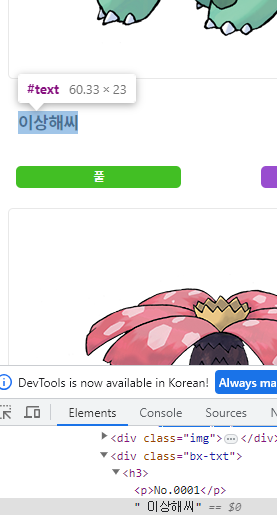

In [58]:
# 정적으로 가져오기
soup.select('div.bx-txt>h3') # 이상해씨 라는 글자가 동적인 text라서 수집이 안됨

[<h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3></h3>,
 <h3

In [62]:
# 동적으로 가져오기
driver.find_elements(By.CLASS_NAME, 'bx-txt>h3')[0].text

'No.0001\n이상해씨'

## 검색어 입력받고 사진 수집하는 코드

In [ ]:
search_name = input('검색어를 입력하세요 : ')  # 검색어 입력받기

driver = wb.Chrome()
driver.get('https://www.naver.com/')
time.sleep(1)

search = driver.find_element(By.ID, 'query')  # 검색창 찾기

search.send_keys(search_name)  # 검색창에 입력 받은 검색어 보내기
search.send_keys(Keys.ENTER)  # ENTER로 검색!

if not os.path.isdir(f'C:/Users/smhrd/Desktop/{search_name}'):  
    os.mkdir(f'C:/Users/smhrd/Desktop/{search_name}')  # 검색어와 같은 이름을 가지는 폴더 바탕화면에 생성
    print('폴더가 생성되었습니다')
else :
    print('폴더가 이미 존재합니다')

# 만약에 탭에서 [통합 이미지] 1번째 인덱스에 이미지탭이 있는 경우만 가능
driver.find_elements(By.CSS_SELECTOR, '.tab')[1].click()  #  ==> '이미지'탭 클릭
time.sleep(2)

body = driver.find_element(By.CSS_SELECTOR, 'body')
for i in range(5):
    body.send_keys(Keys.END)  # 스크롤을 5번 내려주겠다
    time.sleep(2)


# img_list = []
# for j in range(len(driver_img)):
#    img_list.append(driver_img[j].get_attribute('src'))  # 이미지 태그의 src 값을 추출해서 리스트에 담아주기

soup = bs(driver.page_source, 'lxml')
img_list = soup.select('img._image._listImage')
image_list = []
for img in img_list:
    if img['src'][:4] != 'data':
        image_list.append(img['src'])
    
for k in range(len(image_list)):
    urlretrieve(image_list[k], f'C:/Users/smhrd/Desktop/{search_name}/{k+1}번 이미지.jpg')
    # 리스트에 있는 src 경로값을 이미지 파일로 변환해서 저장